## Exploratory Data Analysis and Data Preprocessing for Machine Learning

This notebook serves as a reference for how to perform an initial dataset review, conduct exploratory data analysis (EDA), and preprocess the data to prepare it for use in Machine Learning models. 

While this notebook provides a structured guide, the processes demonstrated here are not definitive and may vary depending on the specific needs and goals of the analysis. The aim is to offer a useful guide that can be adapted and modified accordingly.

In this notebook, I made a demonstration with the dataset flights.csv

### Contents:
1. Loading the Data
2. Initial Data Review
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Training and Test Data, Preparing Your Model

**Author:** [azambrano43](https://github.com/azambrano43)

**Repository:** [Link to the Repository](https://github.com/azambrano43/eda-and-data-preprocessing)

In [31]:
import sys
import os
# Add the 'src' directory to the Python path
sys.path.append(os.path.abspath('src'))
from eda_functions import *
from preprocessing import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Add libraries if needed

### 1. LOADING THE DATA
Load the data from a source (CSV, Excel, database, etc.) into a Pandas DataFrame.

In [3]:
dataset = pd.read_csv("data/flights.csv")

### 2. INITIAL DATA REVIEW
Involves the first assessment of a dataset to understand its structure, content, and quality. This step sets the stage for more detailed analysis and preprocessing.

- **Data Inspection:** Examine the dataset's size, types of variables, and overall structure.
- **Summary Statistics:** Review basic statistics like mean, median, and standard deviation to get an overview of data distributions.
- **Missing Values:** Identify any gaps in the data to determine the extent of missing information.
- **Data Types:** Check data types and formats to ensure they align with expected analysis requirements.


In [4]:
# View the first few rows
dataset.head(5)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [5]:
# Check the dataset size
print(dataset.shape)
print(f"This dataset has {dataset.shape[1]} columns")

(336776, 21)
This dataset has 21 columns


In [6]:
# Review data types
dataset.dtypes

id                  int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
name               object
dtype: object

In [7]:
# Check for missing values
print("Column        # Null values")
count_null_values(dataset) # This function is implemented on /src/eda_functions.py

Column        # Null values


dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64

In [8]:
# Get statistical summary
dataset.describe()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.000000,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,168387.500000,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,97219.001466,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,0.000000,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,84193.750000,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,168387.500000,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,252581.250000,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,336775.000000,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### 3. EXPLORATORY DATA ANALYSIS (EDA)
Involves analyzing data sets to summarize their main characteristics, often using visual methods. The goal is to understand the data, detect patterns, and identify anomalies before applying more complex analysis techniques.

- **Descriptive Statistics:** Summarize central tendency, dispersion, and distribution of the data.
- **Data Visualization:** Use plots like histograms, scatter plots, and box plots to visually inspect data distributions and relationships.
- **Correlation Analysis:** Assess relationships between variables to identify potential predictors and redundancies.
- **Data Cleaning:** Identify and address data quality issues such as missing values and outliers.


<Figure size 1500x1000 with 0 Axes>

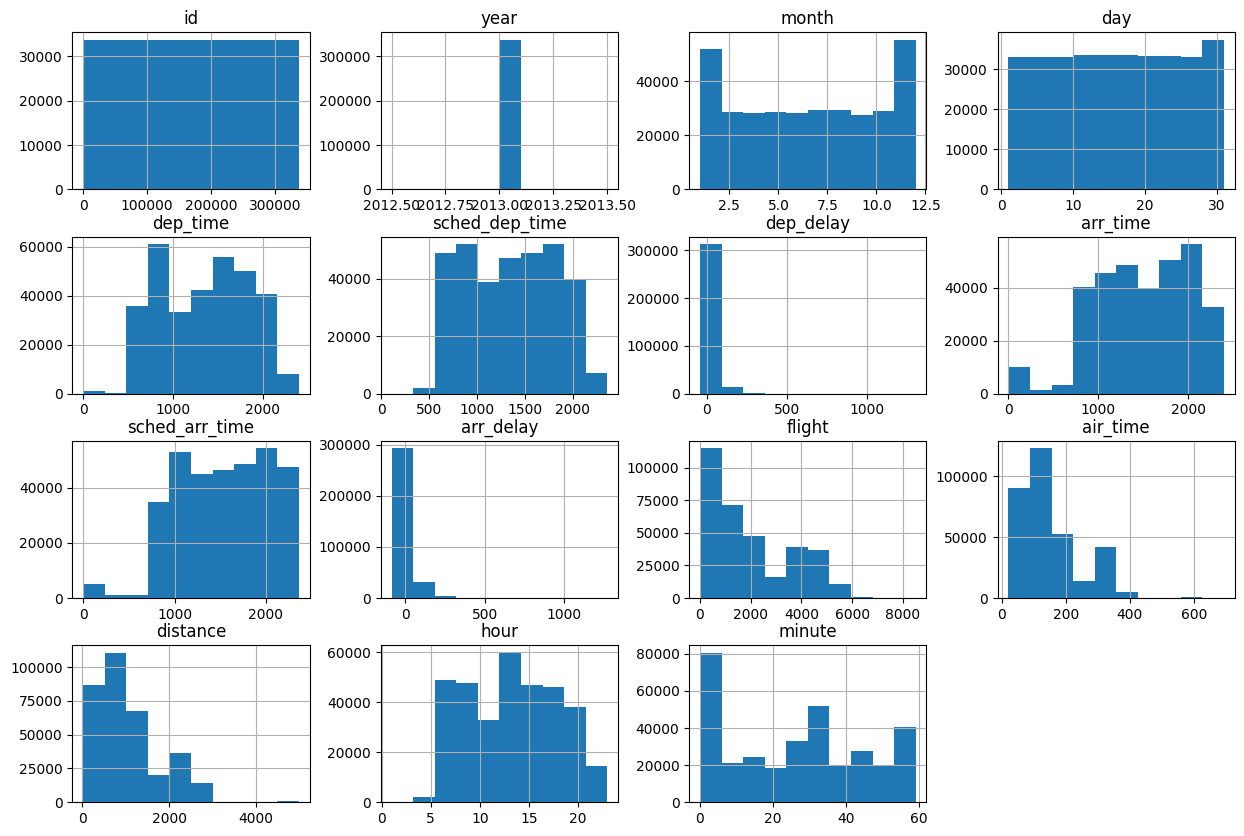

In [9]:
# Plot histograms to see distribution of variables
plot_histograms(dataset, exclude_column="name")

In [10]:
# Pair plots to see relationships between variables
# Change this accord to your dataset
cols_to_pairplot = ["dep_time","arr_time","air_time","distance"]
plot_pairplot(dataset, cols_to_pairplot, hue_column="name")

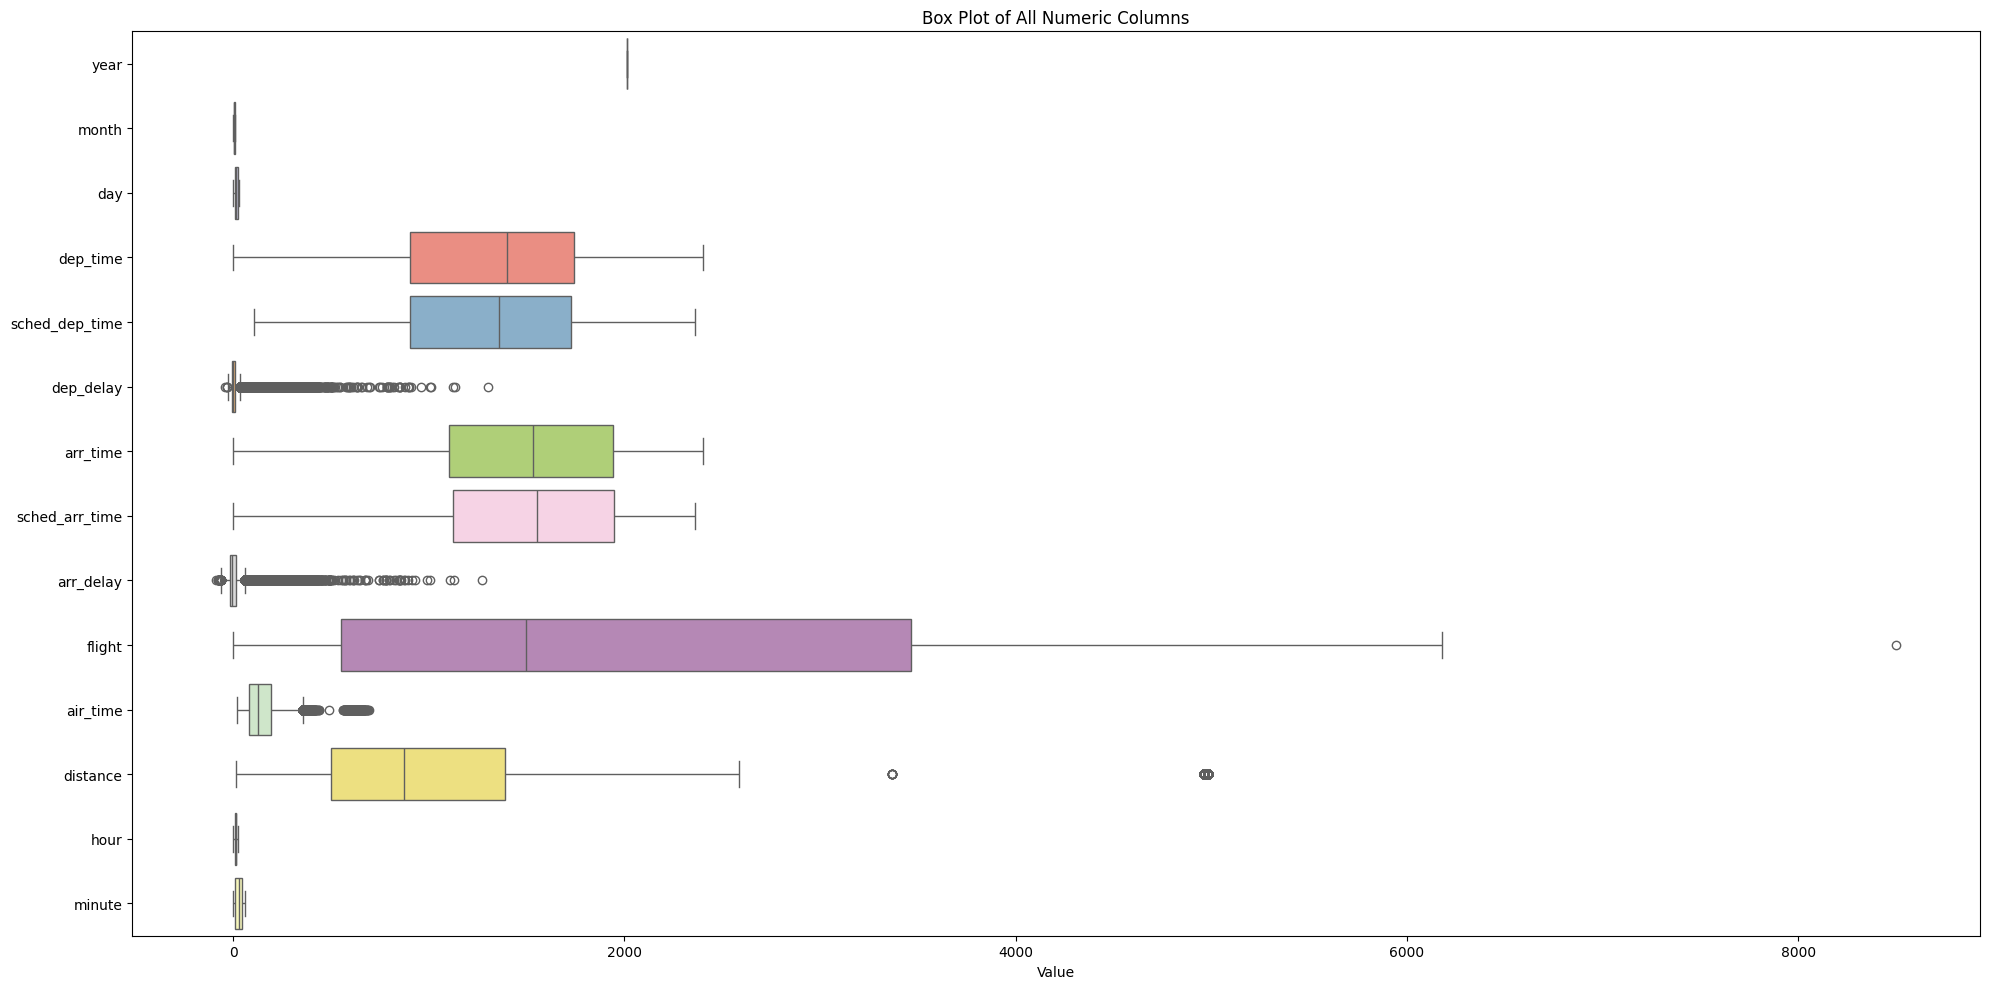

In [11]:
# Identify outliers using boxplots
box_plot(dataset.drop(columns=["id"])) #You can use a 2nd argument to only plot a specific column

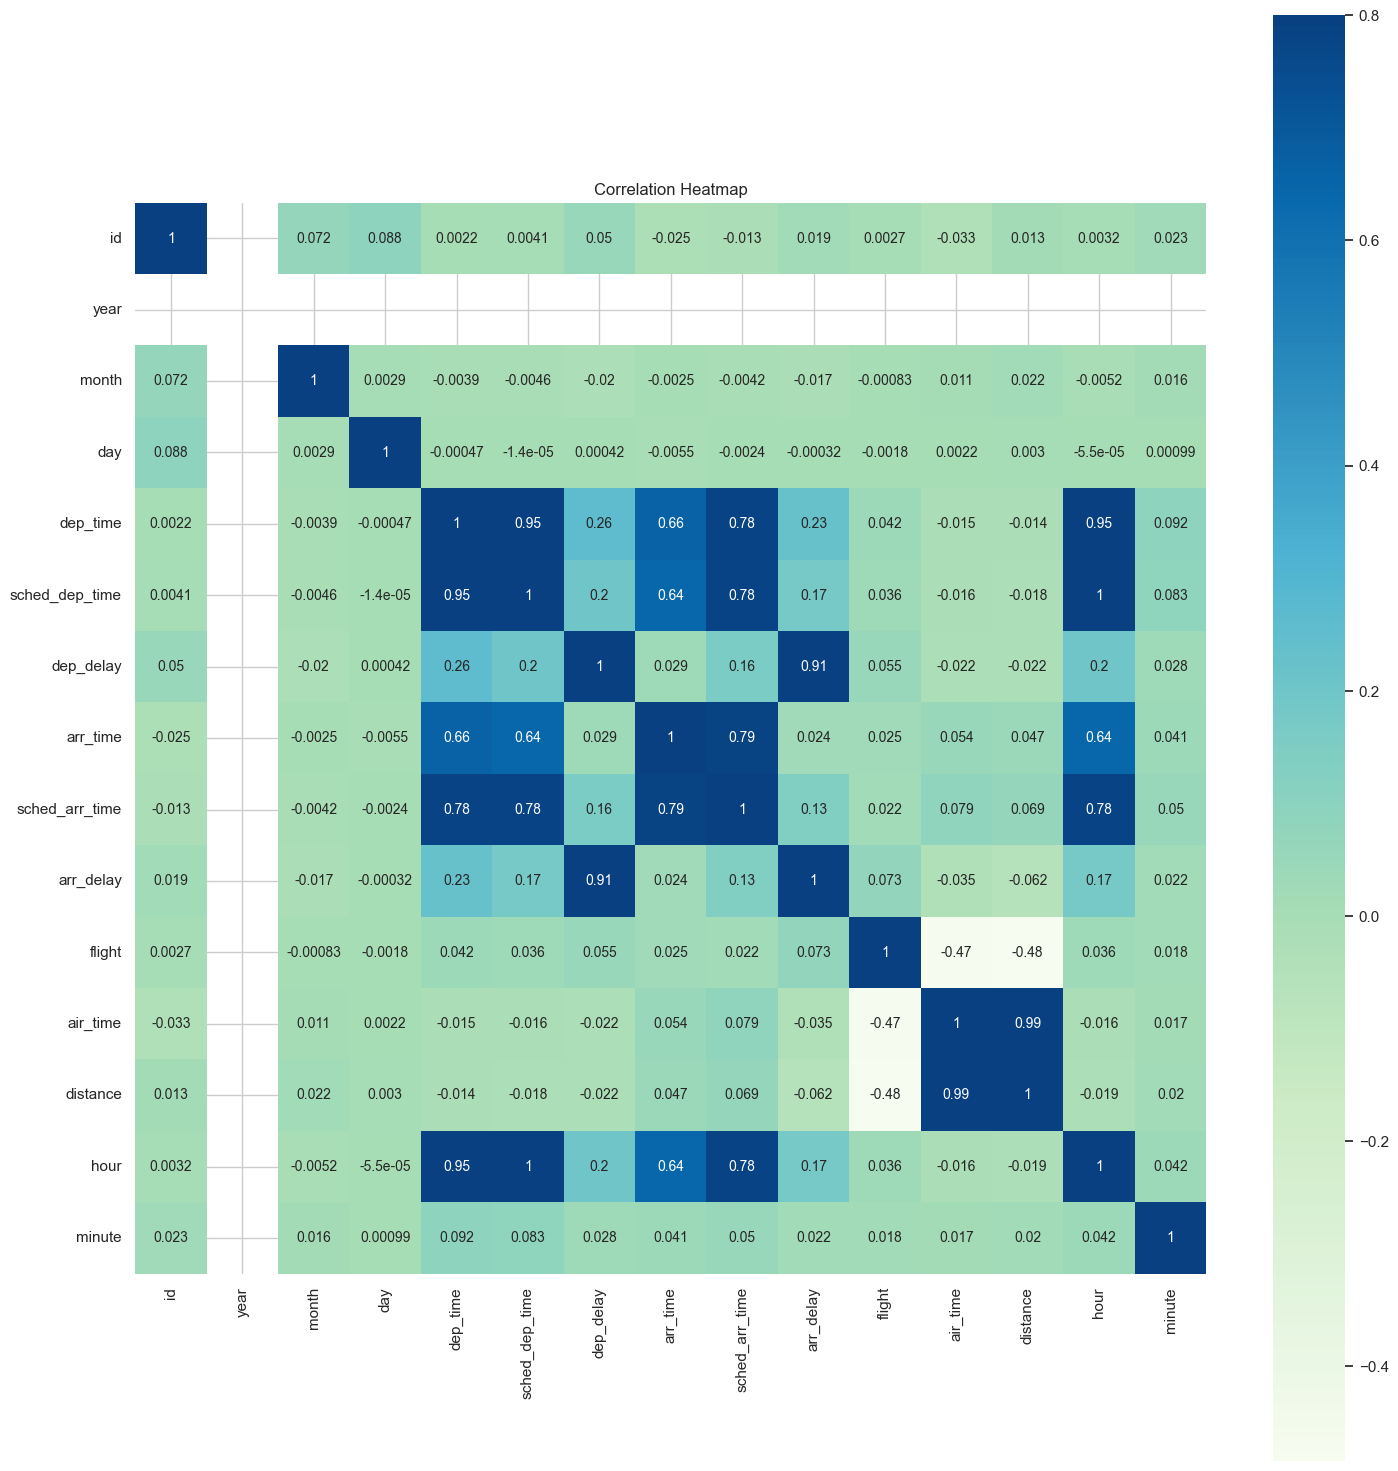

In [12]:
# Heat maps to analyze correlation among numerical variables
heat_map(dataset)

In [13]:
# At this point, we must recognize which columns are truly important and which are not.
# Let's eliminate the columns that are not necessary.

# Code to delete no needed columns
columns_to_delete = ["id", # Because is a unique identifier
                    "year", # Because it has only one unique value
                    "time_hour", # Because it is a datetime
                    "sched_dep_time", # High correlation with dep_time, introduces reduncancy
                    "dep_delay", # High correlation with dep_time, introduces reduncancy
                    "sched_arr_time", # High correlation with arr_time, introduces reduncancy
                    "arr_delay", # High correlation with arr_time, introduces reduncancy
                    ]

conv_dataset = remove_columns(dataset, columns_to_delete)


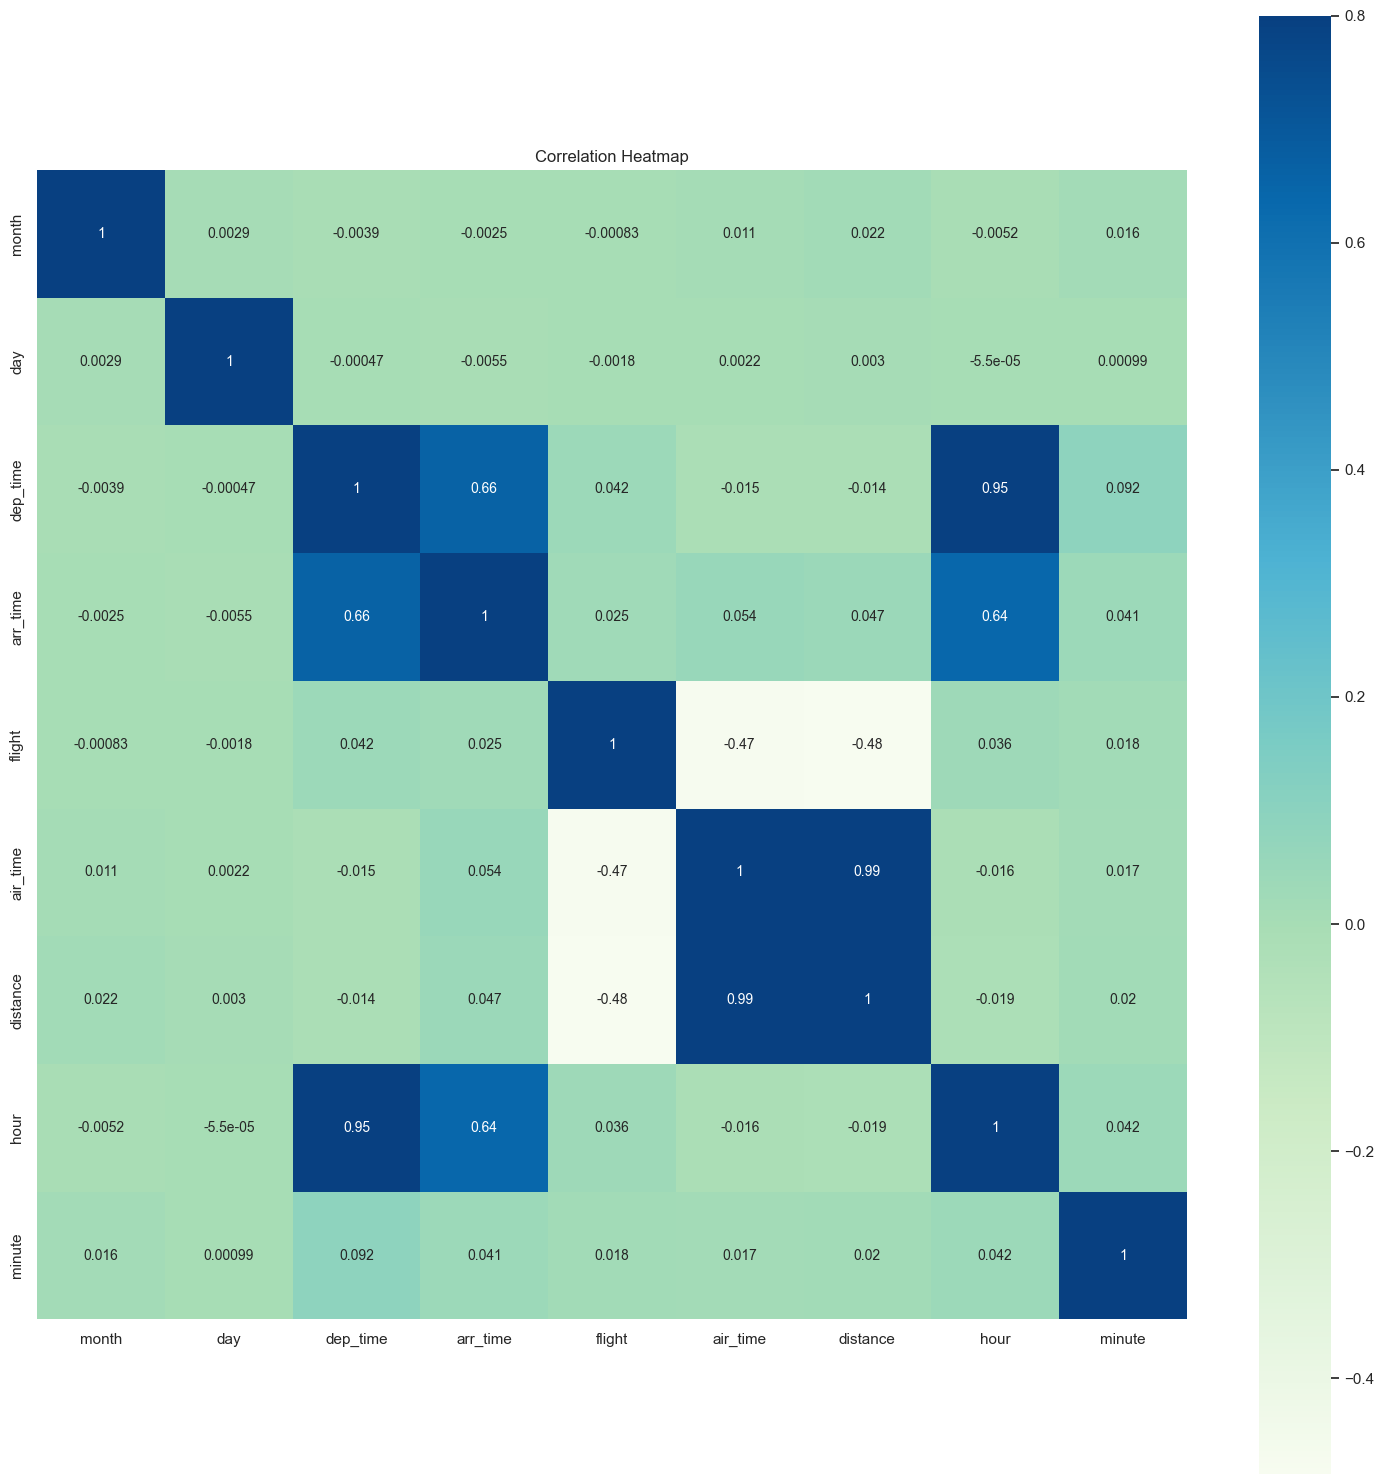

In [14]:
# Let's see the heat map again
heat_map(conv_dataset)

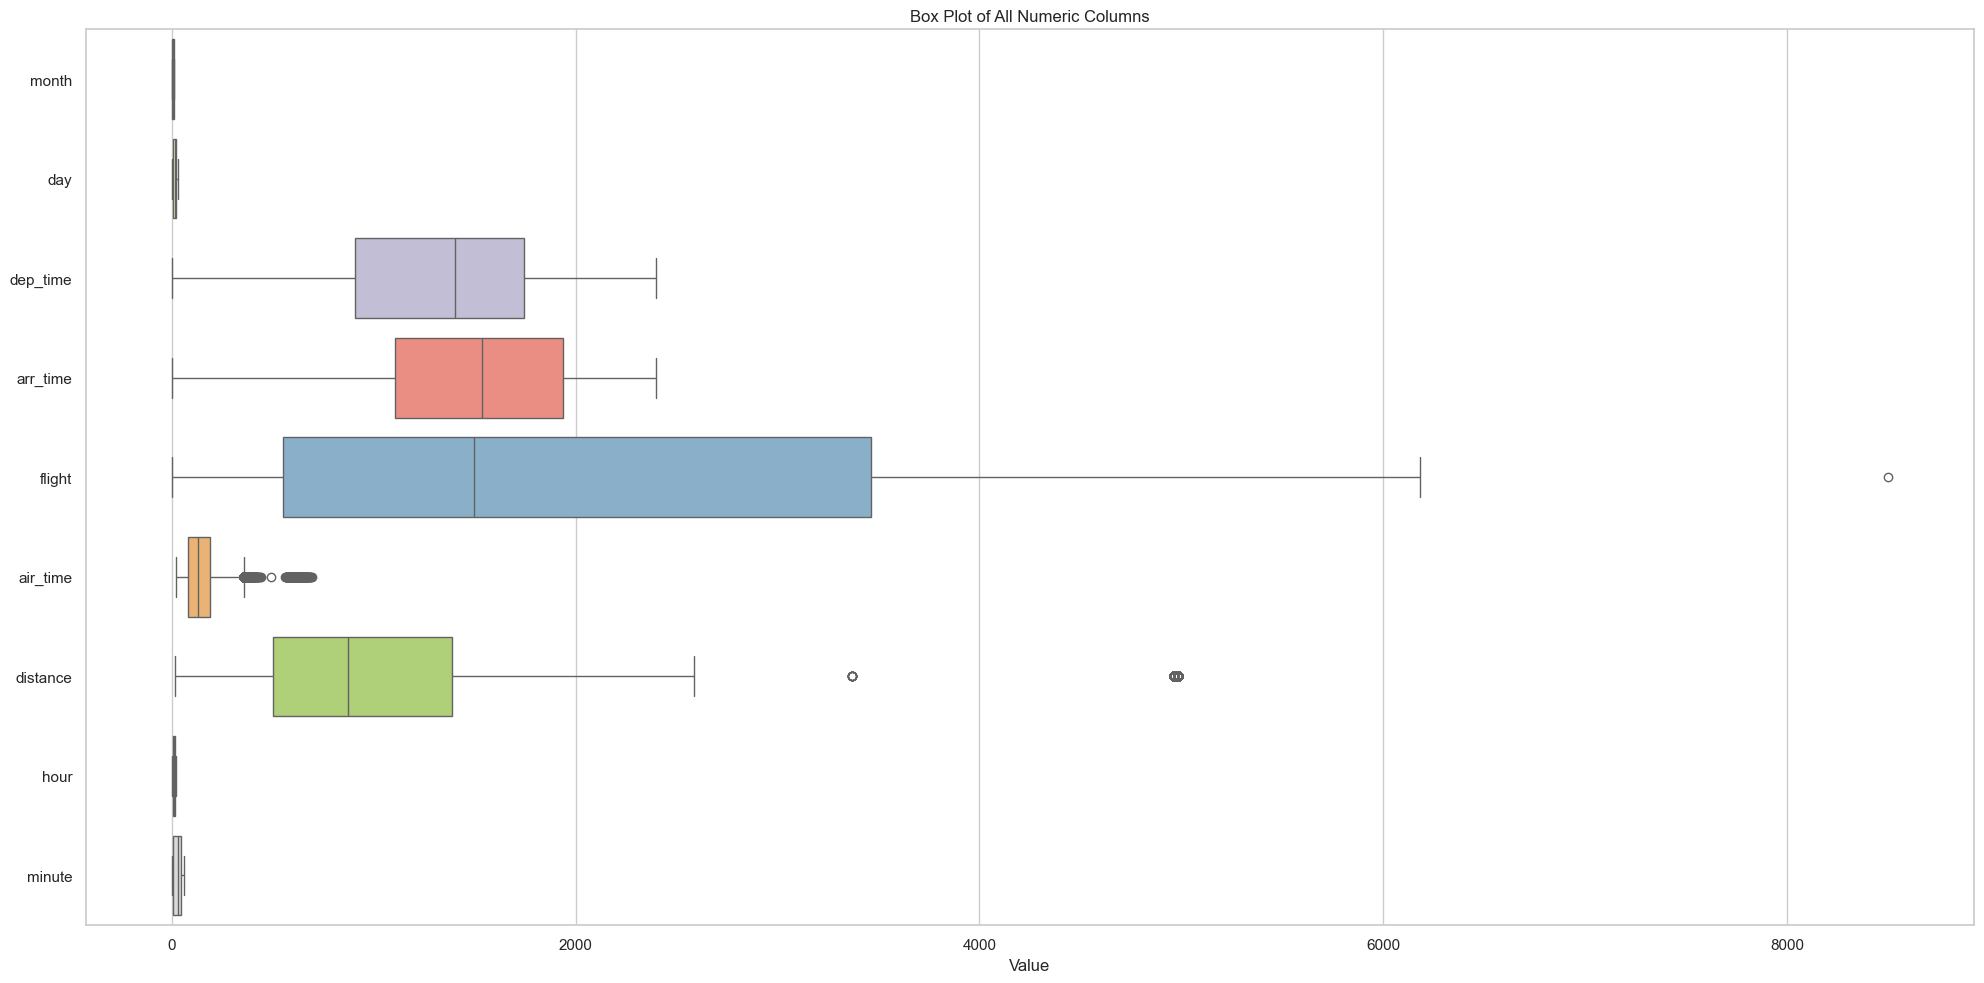

In [15]:
# Let's see the boxplot again
box_plot(conv_dataset)

### 4. DATA PREPROCESSING
Involves preparing raw data for analysis by:

- **Imputing or Removing Missing Values:** Handling gaps by filling them with estimates or removing affected records to maintain data quality.
- **Using Encoders and Scalers:** Converting categorical data to numeric formats and scaling numeric features to ensure equal contribution and model performance.
- **Treating Outliers:** Identifying and addressing extreme values to prevent them from skewing results or affecting model performance.


##### 4.1 Imputing or removing missing values

In [16]:
# Let's see columns with missing values
print(f"Column name      Null values")
count_null_values(conv_dataset)

Column name      Null values


dep_time    8255
arr_time    8713
tailnum     2512
air_time    9430
dtype: int64

In [17]:
# Decide if you want to delete the rows with these missing values or if you want to impute them.

missing_values = count_null_values(conv_dataset)
print("Missing values on dataset: \n")
print(missing_values)
cols_with_missing_values = missing_values.index.tolist()

#================================================================================================
# - If you want to delete them:
# dataset = df.dropna(subset=cols_with_missing_values)
#================================================================================================

#================================================================================================
# - If you want to impute:

# Yoou can use "mean", "median" or "mode" here.
filling_method = "mean" 

dataset = fill_missing_values(conv_dataset, cols_with_missing_values, filling_method)
#================================================================================================

Missing values on dataset: 

dep_time    8255
arr_time    8713
tailnum     2512
air_time    9430
dtype: int64


c:\Users\andre\Documents\eda-and-data-preprocessing\eda-and-data-preprocessing\src\preprocessing.py:174: UserWarning: Column 'tailnum' is of type string. Null values have been filled as 'Unknown'.
  warnings.warn(f"Column '{col}' is of type string. Null values have been filled as 'Unknown'.")


##### 4.2 Encode categorical variables

In [26]:
# Let's look for columns with few unique values
count_unique_values(conv_dataset)

,Unique Count,Data Type
month,12,int64
day,31,int64
dep_time,1318,float64
arr_time,1411,float64
carrier,16,int32
flight,3844,float64
tailnum,4044,float64
origin,3,int32
dest,105,int32
air_time,273,float64


In [19]:
# Now, let's code the variables that need it
cols_to_encode = ["carrier", "tailnum", "origin", "dest", "name"]
encode_type = "label" # Use "label" for LabelEncoder or "dummies" to use pd.dummies

conv_dataset = encode_columns(conv_dataset, cols_to_encode, encode_type)

#### 4.3 Scaling variables to avoid disproportionality

In [20]:
# Let's identify columns with wide ranges, which should be scaled
print(conv_dataset.describe())

               month            day       dep_time       arr_time  \
count  336776.000000  336776.000000  328521.000000  328063.000000   
mean        6.548510      15.710787    1349.109947    1502.054999   
std         3.414457       8.768607     488.281791     533.264132   
min         1.000000       1.000000       1.000000       1.000000   
25%         4.000000       8.000000     907.000000    1104.000000   
50%         7.000000      16.000000    1401.000000    1535.000000   
75%        10.000000      23.000000    1744.000000    1940.000000   
max        12.000000      31.000000    2400.000000    2400.000000   

             carrier         flight        tailnum         origin  \
count  336776.000000  336776.000000  336776.000000  336776.000000   
mean        6.142492    1971.923620    1829.948345       0.951977   
std         4.136184    1632.471938    1210.569915       0.816867   
min         0.000000       1.000000       0.000000       0.000000   
25%         3.000000     553.0000

In [22]:
# Now, let's scale variables that need it
cols_to_scale = ["dep_time", "arr_time", "flight", "tailnum","air_time", "distance"] #Cols with high range
scaling_method = "standard" # You can choose between "standard" and "minmax"

conv_dataset = scale_columns(conv_dataset, cols_to_scale, scaling_method)

#### 4.4 Treatment of outliers

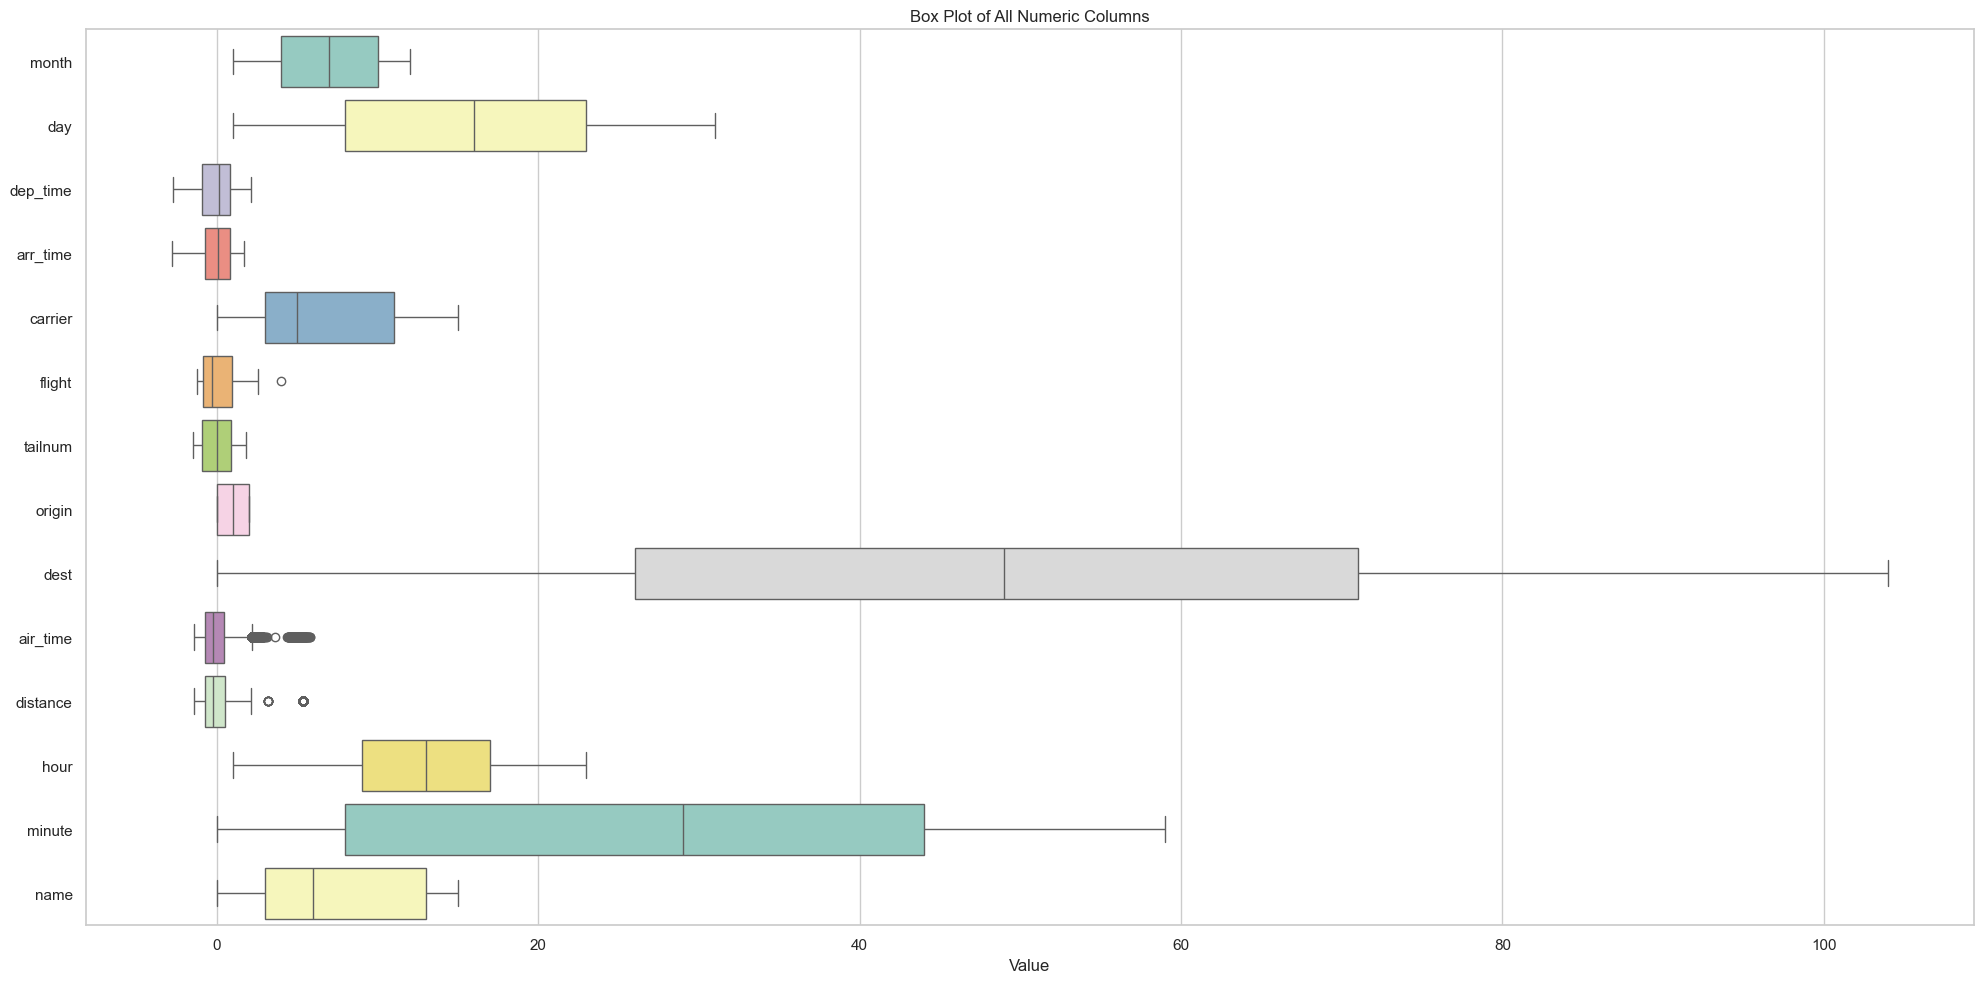

In [23]:
# First, let's see which columns have outliers
box_plot(conv_dataset)

In [24]:
# Now, lets clip this outliers

cols_to_clip = ["air_time"] # We can see in the boxplot that box_plot has many outliers
lower_perc = 0.10  # Define the lower percentile (10%) for outlier trimming
upper_perc = 0.90  # Define the upper percentile (90%) for outlier trimming

cleaned_dataset = clip_outliers(conv_dataset, cols_to_clip, lower_perc, upper_perc)

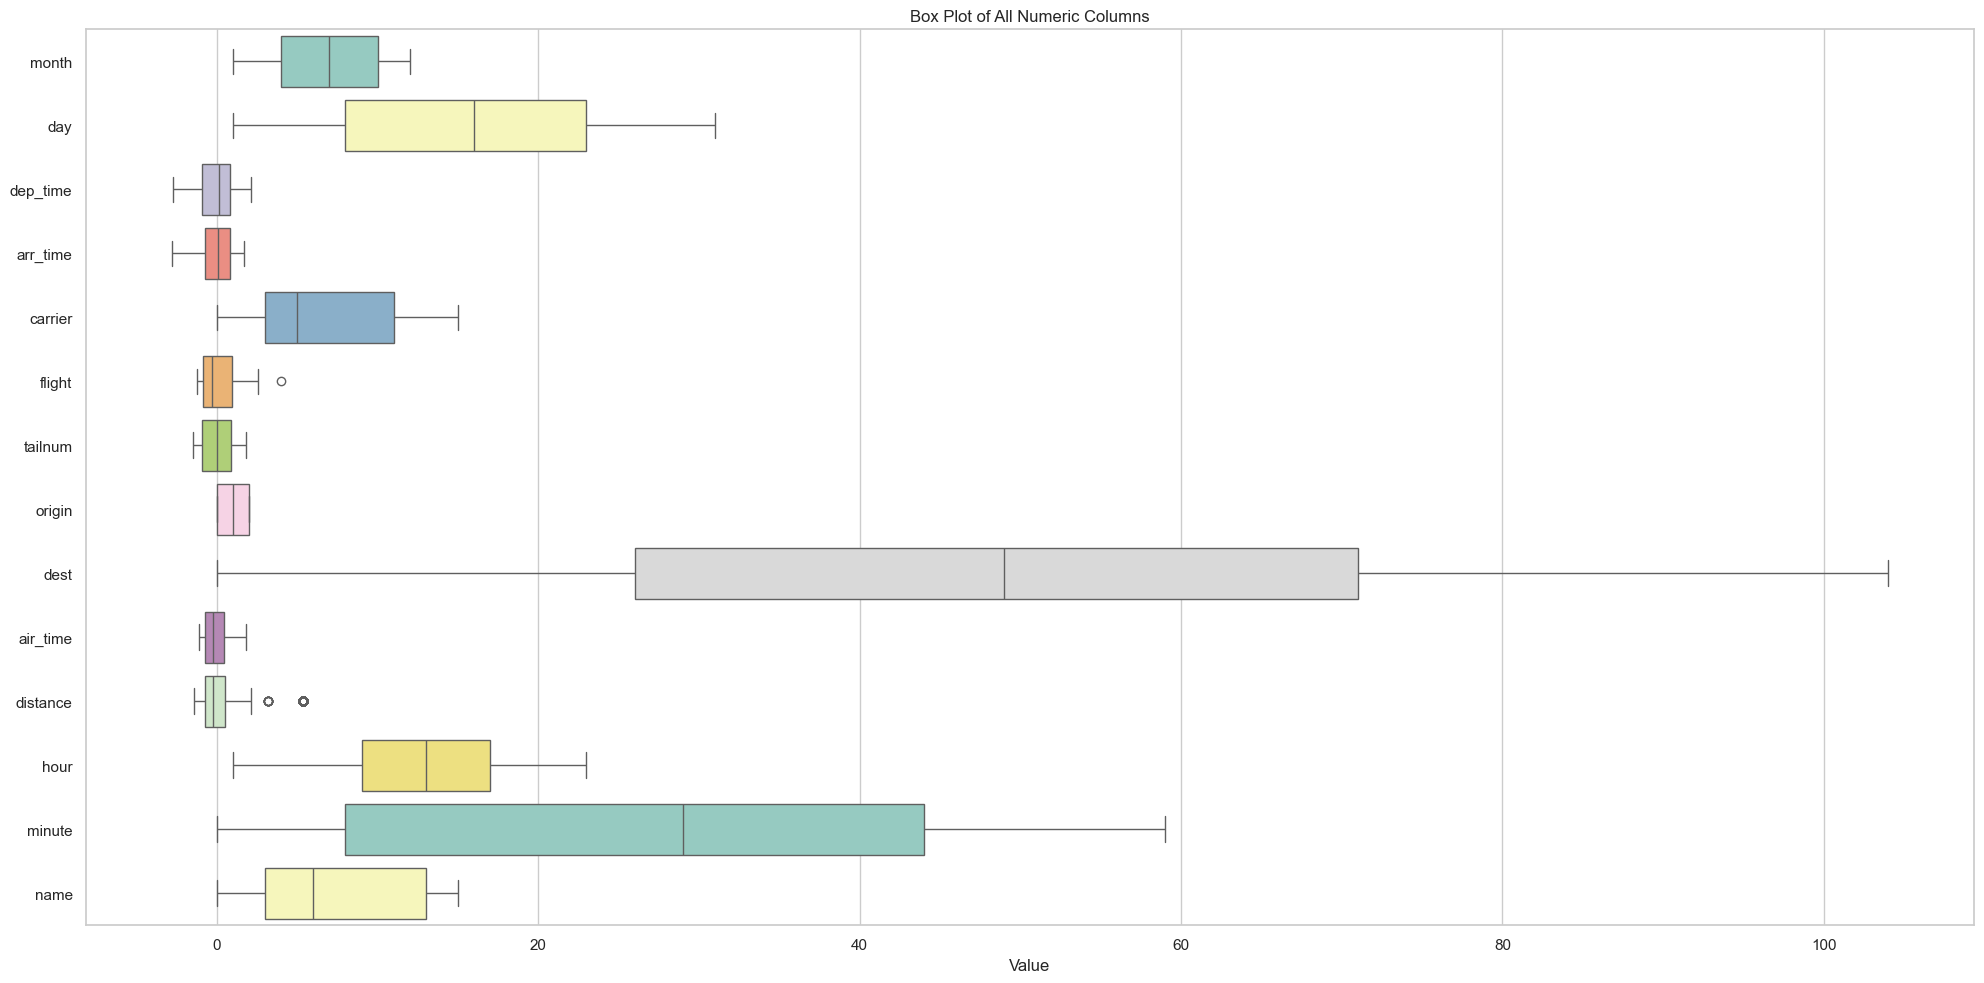

In [25]:
# Let's check the boxplot again
box_plot(cleaned_dataset)

### 5. TRAINING AND TEST DATA, PREPARE YOUR MODEL

In this step, the dataset is divided into training and test sets. 

The specific construction of the model and any further preparation are left to the discretion of the user of this notebook. This approach allows flexibility in selecting and fine-tuning models according to the analysis needs.


In [29]:
# Define the feature columns and the target variable
X = cleaned_dataset.drop(columns=['air_time'])
y = cleaned_dataset['air_time']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (269420, 13)
Test features shape: (67356, 13)
Training target shape: (269420,)
Test target shape: (67356,)
